In [20]:
import pandas as pd
from pandas import DataFrame
from sklearn import preprocessing
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
from itertools import islice

In [4]:
df = pd.read_csv('hotels_data.csv')

In [5]:
df.head()

,Snapshot ID,Snapshot Date,Checkin Date,Days,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Name,Hotel Stars
0,1,7/17/2015 0:00,8/12/2015 0:00,5,1178,1040,1,6,Best Western Plus Seaport Inn Downtown,3
1,1,7/17/2015 0:00,8/19/2015 0:00,5,1113,982,1,8,Best Western Plus Seaport Inn Downtown,3
2,1,7/17/2015 0:00,8/13/2015 0:00,5,4370,4240,1,3,The Peninsula New York,5
3,1,7/17/2015 0:00,7/26/2015 0:00,5,1739,1667,1,18,Eventi Hotel a Kimpton Hotel,4
4,1,7/17/2015 0:00,8/12/2015 0:00,5,1739,1672,1,3,Eventi Hotel a Kimpton Hotel,4


In [6]:
# get the 150 hotels with maximum records
groupedTopHotels = df.groupby(['Hotel Name']).size().reset_index(name='counts').sort_values('counts', ascending=False).head(150)

In [7]:
groupedTopHotels.head()

,Hotel Name,counts
327,Newark Liberty International Airport Marriott,5346
194,Hilton Garden Inn Times Square,4892
374,Residence Inn Newark Elizabeth Liberty Interna...,4314
538,Westin New York at Times Square,3792
290,Loews Regency New York Hotel,3617


In [8]:
df = df[df['Hotel Name'].isin(groupedTopHotels['Hotel Name'])]

In [9]:
# get the 40 checkin dates with maximum records
groupedTopDates = df.groupby(['Checkin Date']).size().reset_index(name='counts').sort_values('counts', ascending=False).head(40)

In [10]:
groupedTopDates.head()

,Checkin Date,counts
64,11/11/2015 0:00,2302
36,10/14/2015 0:00,1887
86,11/4/2015 0:00,1885
151,8/19/2015 0:00,1883
51,10/28/2015 0:00,1861


In [11]:
df = df[df['Checkin Date'].isin(groupedTopDates['Checkin Date'])]

In [12]:
df.head()

,Snapshot ID,Snapshot Date,Checkin Date,Days,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Name,Hotel Stars
2,1,7/17/2015 0:00,8/13/2015 0:00,5,4370,4240,1,3,The Peninsula New York,5
4,1,7/17/2015 0:00,8/12/2015 0:00,5,1739,1672,1,3,Eventi Hotel a Kimpton Hotel,4
7,1,7/17/2015 0:00,8/12/2015 0:00,5,1256,1183,1,5,Grand Hyatt New York,4
8,1,7/17/2015 0:00,8/13/2015 0:00,5,1256,1201,1,54,Grand Hyatt New York,4
29,1,7/17/2015 0:00,8/12/2015 0:00,5,3763,3378,1,39,Park Hyatt New York,5


In [13]:
# For each hotel with given checking date and discount code keep the minimum discount price (among different snapshot dates)
grouped_df =df.groupby(['Hotel Name','Checkin Date','Discount Code']).agg({'Discount Price': 'min'})

In [14]:
# unstack data to get hotel and its 160 discount prices (40 checking dates * 4 Discount codes)
reduced_df = grouped_df.unstack(fill_value=-1).unstack(fill_value=-1).reset_index()
reduced_df.head()

Hotel Name Discount Price  \
Discount Code                                                      1   
Checkin Date                                          10/1/2015 0:00   
0                                        Aloft Harlem             -1   
1               Andaz 5th Avenue - a concept by Hyatt           2185   
2              Andaz Wall Street - a concept by Hyatt             -1   
3              Baccarat Hotel and Residences New York             -1   
4                                       Bentley Hotel             -1   

                                                                              \
Discount Code                                                                  
Checkin Date  10/14/2015 0:00 10/15/2015 0:00 10/16/2015 0:00 10/2/2015 0:00   
0                        1381              -1              -1             -1   
1                          -1            2495            2195           2145   
2                        1625              -1              -1             -1   
3                          -1              -1              -1             -1   
4                          -1              -1              -1             -1   

                                                                               \
Discount Code                                                                   
Checkin Date  10/21/2015 0:00 10/22/2015 0:00 10/27/2015 0:00 10/28/2015 0:00   
0                        1175              -1              -1            1537   
1                          -1            2066              -1            2116   
2                        1925            1750              -1            1670   
3                          -1              -1              -1              -1   
4                        1405              -1              -1              -1   

                   ...                                                    \
Discount Code      ...                   4                                 
Checkin Date       ...      8/26/2015 0:00 8/27/2015 0:00 8/28/2015 0:00   
0                  ...                  -1             -1            988   
1                  ...                  -1             -1             -1   
2                  ...                  -1             -1             -1   
3                  ...                  -1             -1             -1   
4                  ...                  -1             -1             -1   

                                                                           \
Discount Code                                                               
Checkin Date  9/10/2015 0:00 9/11/2015 0:00 9/16/2015 0:00 9/17/2015 0:00   
0                       1065             -1             -1             -1   
1                         -1             -1           2750           2885   
2                       1665             -1             -1             -1   
3                         -1             -1             -1             -1   
4                         -1             -1             -1             -1   

                                                           
Discount Code                                              
Checkin Date  9/18/2015 0:00 9/30/2015 0:00 9/9/2015 0:00  
0                         -1             -1            -1  
1                       2026             -1            -1  
2                       1855           2710            -1  
3                         -1             -1            -1  
4                         -1             -1            -1  

[5 rows x 161 columns]

In [15]:
reduced_df['Hotel Name'].count()

149

In [16]:
# Find the hotels without records (in the top recorded dates)
hotelsWithoutRecords = set(groupedTopHotels['Hotel Name']) ^ set(reduced_df['Hotel Name'])

In [17]:
# Add missing Hotel rows
hotelRow = [-1] * 161
for hotel in hotelsWithoutRecords:
    print(hotel)
    hotelRow[0] = hotel
    reduced_df = reduced_df.append(pd.Series(hotelRow,index=reduced_df.columns), ignore_index=True)
reduced_df.tail()

Embassy Suites Newark Airport


Hotel Name Discount Price  \
Discount Code                                                              1   
Checkin Date                                                  10/1/2015 0:00   
145                                  Wyndham Garden Chinatown             -1   
146            Wyndham Garden Long Island City Manhattan View             -1   
147                                        Wyndham New Yorker             -1   
148                               ink48 hotel a Kimpton Hotel           1436   
149                             Embassy Suites Newark Airport             -1   

                                                                              \
Discount Code                                                                  
Checkin Date  10/14/2015 0:00 10/15/2015 0:00 10/16/2015 0:00 10/2/2015 0:00   
145                        -1              -1              -1             -1   
146                        -1              -1              -1             -1   
147                        -1              -1              -1             -1   
148                        -1              -1              -1           1667   
149                        -1              -1              -1             -1   

                                                                               \
Discount Code                                                                   
Checkin Date  10/21/2015 0:00 10/22/2015 0:00 10/27/2015 0:00 10/28/2015 0:00   
145                        -1              -1              -1              -1   
146                        -1              -1              -1              -1   
147                        -1              -1              -1              -1   
148                        -1              -1              -1              -1   
149                        -1              -1              -1              -1   

                   ...                                                    \
Discount Code      ...                   4                                 
Checkin Date       ...      8/26/2015 0:00 8/27/2015 0:00 8/28/2015 0:00   
145                ...                  -1             -1             -1   
146                ...                  -1             -1             -1   
147                ...                  -1             -1             -1   
148                ...                  -1             -1           1084   
149                ...                  -1             -1             -1   

                                                                           \
Discount Code                                                               
Checkin Date  9/10/2015 0:00 9/11/2015 0:00 9/16/2015 0:00 9/17/2015 0:00   
145                       -1             -1             -1             -1   
146                       -1             -1             -1             -1   
147                       -1             -1             -1             -1   
148                       -1             -1             -1             -1   
149                       -1             -1             -1             -1   

                                                           
Discount Code                                              
Checkin Date  9/18/2015 0:00 9/30/2015 0:00 9/9/2015 0:00  
145                       -1             -1            -1  
146                       -1             -1            -1  
147                       -1             -1            -1  
148                       -1             -1            -1  
149                       -1             -1            -1  

[5 rows x 161 columns]

In [18]:
reduced_df['Hotel Name'].count()

150

In [19]:
# Returns the minimum price of the given row
def getMinimumPrice(row):
    min_value = None
    for col in islice(reduced_df, 1, None): #reduced_df.iloc[:-1, :]:   
        if not min_value:
            min_value = row[col]
        elif row[col] < min_value and row[col] != -1:
            min_value = row[col]
    return min_value

In [21]:
# Returns the normelized price of the given row
def getNormalizedPrice(min_price, max_price, price):
    return (price - min_price) / (max_price - min_price) * 100

In [24]:
# getting all hotels max prices
max_prices = reduced_df.max(axis=1)

# setting default values for max, min, and normalized price
hotel_max = None
hotel_min = None
normalized = None

In [25]:
for index, row in reduced_df.iterrows():
# getting current hotel's max and min prices
    hotel_max = max_prices[index]
    hotel_min = getMinimumPrice(row)
    for col in islice(reduced_df, 1, None):
        if (row[col] != -1):
            # saving the normalized price of eace of the hotel's prices
            normalized =(getNormalizedPrice(hotel_min,hotel_max,row[col])) 
            reduced_df.iloc[index, reduced_df.columns.get_loc(col)] = normalized

In [26]:
dist = linkage(reduced_df.iloc[:, 1:],'ward')
type(dist)
dist.shape

(149, 4)

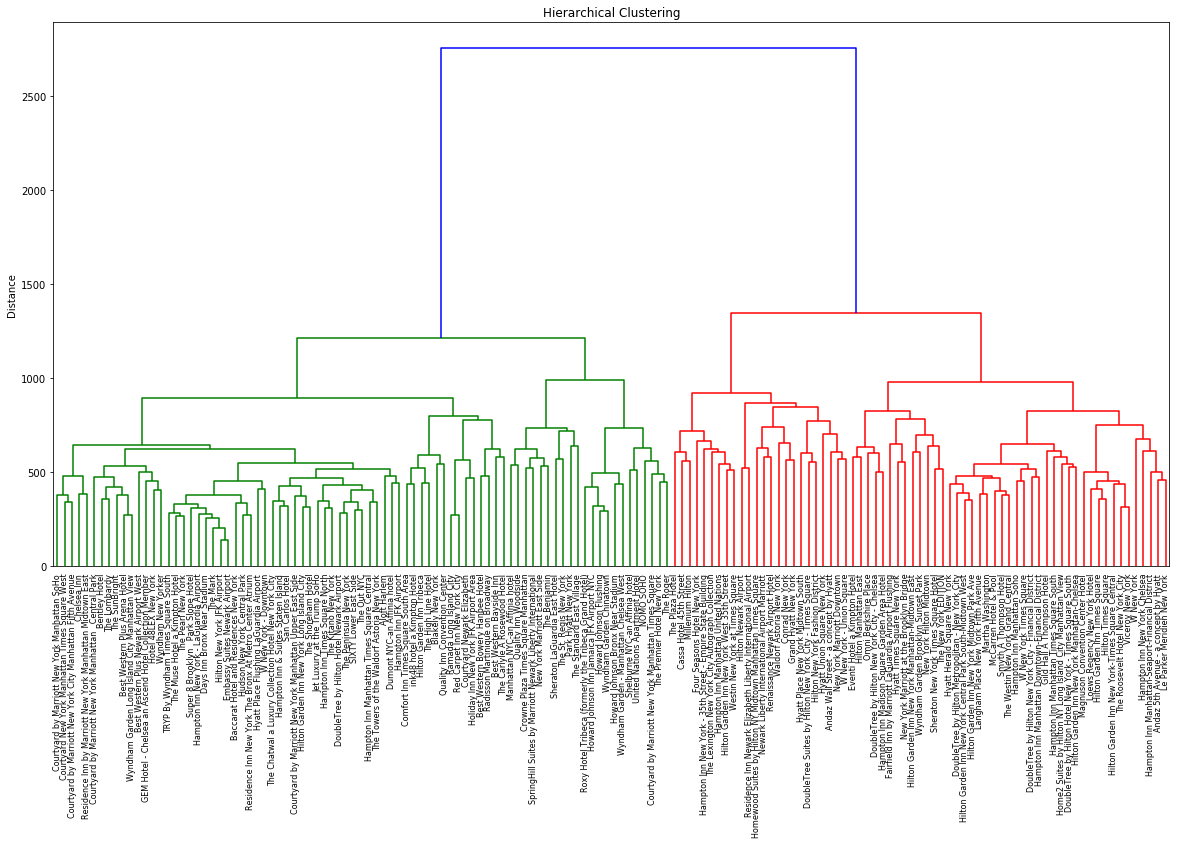

In [27]:
plt.figure(figsize=(20,10))
plt.title('Hierarchical Clustering')
plt.ylabel('Distance')
dendrogram(dist, labels=reduced_df['Hotel Name'].tolist(), leaf_rotation=90,leaf_font_size=8)
plt.show()

In [28]:
#get the cluster value accroding to threshold and set it as new column to the hotels data frame
lbl = fcluster(dist,t=750,criterion='distance')
type(lbl)
print(lbl)

[ 1 16 11  1  1  4  4  1  1  2  7  1  2  9  1  3  1  1  1  6  1  5  1 10
 15  1 15 12 15  1 12 13  7  1 15  9  1  1 12 15 15  1 15  7 16  7  1 16
  1 15  1 15 14 15  7 16 16  2 12 10  1  8 16  3 15  9  1  6  6  6  1 15
  1 10 13 11  1 15 16 16 16  5 15 15  7  6 14 11  5 13  9 12  5  2  5  4
  3  3  9  1  8  1  6  1  1  6  5 14 15  5  1  1  5  4  1  2  1  7  1  1
  1 14  1  1  1  7  6  6 16  1  5  5  1  1 15  6 16 16  1 11 15  9  7  6
 14  6  1  1  2  1]


In [30]:
reduced_df['Cluster'] = lbl
reduced_df.head()

Hotel Name Discount Price  \
Discount Code                                                      1   
Checkin Date                                          10/1/2015 0:00   
0                                        Aloft Harlem       -1.00000   
1               Andaz 5th Avenue - a concept by Hyatt       52.71028   
2              Andaz Wall Street - a concept by Hyatt       -1.00000   
3              Baccarat Hotel and Residences New York       -1.00000   
4                                       Bentley Hotel       -1.00000   

                                                                              \
Discount Code                                                                  
Checkin Date  10/14/2015 0:00 10/15/2015 0:00 10/16/2015 0:00 10/2/2015 0:00   
0                   91.284548       -1.000000       -1.000000      -1.000000   
1                   -1.000000       72.024922       53.333333      50.218069   
2                   68.759557       -1.000000       -1.000000      -1.000000   
3                   -1.000000       -1.000000       -1.000000      -1.000000   
4                   -1.000000       -1.000000       -1.000000      -1.000000   

                                                                               \
Discount Code                                                                   
Checkin Date  10/21/2015 0:00 10/22/2015 0:00 10/27/2015 0:00 10/28/2015 0:00   
0                   79.775682       -1.000000            -1.0      100.000000   
1                   -1.000000       45.295950            -1.0       48.411215   
2                   77.397467       72.358686            -1.0       70.055243   
3                   -1.000000       -1.000000            -1.0       -1.000000   
4                   59.564728       -1.000000            -1.0       -1.000000   

                ...                                                 \
Discount Code   ...                4                                 
Checkin Date    ...   8/27/2015 0:00 8/28/2015 0:00 9/10/2015 0:00   
0               ...             -1.0      69.328314      73.630171   
1               ...             -1.0      -1.000000      -1.000000   
2               ...             -1.0      -1.000000      69.911278   
3               ...             -1.0      -1.000000      -1.000000   
4               ...             -1.0      -1.000000      -1.000000   

                                                                           \
Discount Code                                                               
Checkin Date  9/11/2015 0:00 9/16/2015 0:00 9/17/2015 0:00 9/18/2015 0:00   
0                       -1.0      -1.000000      -1.000000      -1.000000   
1                       -1.0      87.912773      96.323988      42.803738   
2                       -1.0      -1.000000      -1.000000      75.381955   
3                       -1.0      -1.000000      -1.000000      -1.000000   
4                       -1.0      -1.000000      -1.000000      -1.000000   

                                           Cluster  
Discount Code                                       
Checkin Date  9/30/2015 0:00 9/9/2015 0:00          
0                       -1.0          -1.0       1  
1                       -1.0          -1.0      16  
2                      100.0          -1.0      11  
3                       -1.0          -1.0       1  
4                       -1.0          -1.0       1  

[5 rows x 162 columns]

In [31]:
reduced_df.sort_values(['Cluster'], ascending=[1],inplace=True)
reduced_df.head()

Hotel Name Discount Price  \
Discount Code                                                          1   
Checkin Date                                              10/1/2015 0:00   
0                                            Aloft Harlem      -1.000000   
37                                Hampton Inn JFK Airport      -1.000000   
41             Hampton Inn Manhattan Times Square Central      55.284553   
46               Hampton Inn New York - LaGuardia Airport      -1.000000   
48                         Hampton Inn Times Square North      52.926628   

                                                                              \
Discount Code                                                                  
Checkin Date  10/14/2015 0:00 10/15/2015 0:00 10/16/2015 0:00 10/2/2015 0:00   
0                   91.284548            -1.0       -1.000000      -1.000000   
37                  -1.000000            -1.0       -1.000000      -1.000000   
41                  44.308943            -1.0       49.186992      57.317073   
46                  -1.000000            -1.0       -1.000000      -1.000000   
48                  -1.000000            -1.0       -1.000000      -1.000000   

                                                                               \
Discount Code                                                                   
Checkin Date  10/21/2015 0:00 10/22/2015 0:00 10/27/2015 0:00 10/28/2015 0:00   
0                   79.775682       -1.000000       -1.000000      100.000000   
37                  -1.000000       -1.000000       85.264667       77.030217   
41                  -1.000000       31.148374       49.695122       62.754065   
46                  -1.000000       -1.000000       -1.000000       -1.000000   
48                  66.117065       -1.000000       -1.000000       -1.000000   

                ...                                                 \
Discount Code   ...                4                                 
Checkin Date    ...   8/27/2015 0:00 8/28/2015 0:00 9/10/2015 0:00   
0               ...        -1.000000      69.328314      73.630171   
37              ...        -1.000000      -1.000000      -1.000000   
41              ...        39.481707      -1.000000      -1.000000   
46              ...        -1.000000      -1.000000      -1.000000   
48              ...        -1.000000      -1.000000      53.751031   

                                                                           \
Discount Code                                                               
Checkin Date  9/11/2015 0:00 9/16/2015 0:00 9/17/2015 0:00 9/18/2015 0:00   
0                       -1.0      -1.000000           -1.0           -1.0   
37                      -1.0      -1.000000           -1.0           -1.0   
41                      -1.0      -1.000000           -1.0           -1.0   
46                      -1.0      -1.000000           -1.0           -1.0   
48                      -1.0      65.375103           -1.0           -1.0   

                                           Cluster  
Discount Code                                       
Checkin Date  9/30/2015 0:00 9/9/2015 0:00          
0                       -1.0          -1.0       1  
37                      -1.0          -1.0       1  
41                     100.0          -1.0       1  
46                      -1.0          -1.0       1  
48                      -1.0          -1.0       1  

[5 rows x 162 columns]